In [14]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from tqdm.notebook import tqdm
import random
import warnings
warnings.filterwarnings("ignore")


In [15]:
(trainX, trainY), (testX, testY) = tf.keras.datasets.fashion_mnist.load_data()

# Reshape to add channel dimension
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

# One-hot encode the labels
trainY_cat = tf.keras.utils.to_categorical(trainY)
testY_cat = tf.keras.utils.to_categorical(testY)

# Normalize pixel values
train_norm = trainX.astype('float32') / 255.0
test_norm = testX.astype('float32') / 255.0


In [16]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

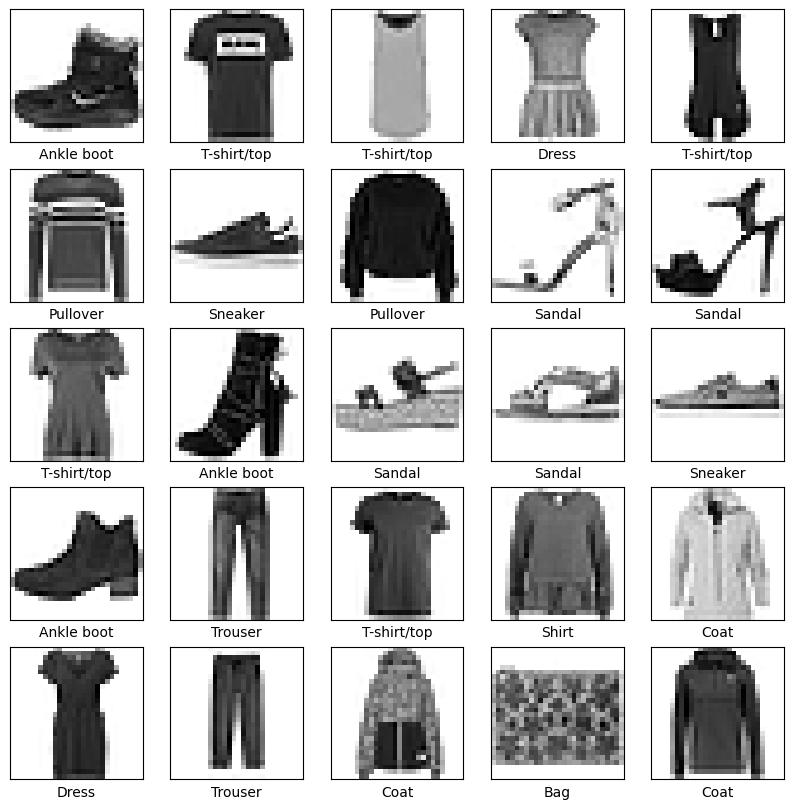

In [17]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([]); plt.yticks([]); plt.grid(False)
    plt.imshow(trainX[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[trainY[i]])
plt.show()


In [19]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    tf.keras.layers.AvgPool2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.AvgPool2D((2, 2)),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(10, activation="softmax")
])


In [20]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(trainX, trainY_cat, epochs=10, validation_data=(testX, testY_cat))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 101s 47ms/step - accuracy: 0.6090 - loss: 1.2492 - val_accuracy: 0.7380 - val_loss: 0.7262
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 75s 40ms/step - accuracy: 0.8116 - loss: 0.5389 - val_accuracy: 0.8294 - val_loss: 0.4942
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 72s 38ms/step - accuracy: 0.8329 - loss: 0.4687 - val_accuracy: 0.8423 - val_loss: 0.4585
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 40ms/step - accuracy: 0.8448 - loss: 0.4370 - val_accuracy: 0.8554 - val_loss: 0.4159
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 101s 50ms/step - accuracy: 0.8565 - loss: 0.4073 - val_accuracy: 0.8435 - val_loss: 0.4533
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 140s 49ms/step - accuracy: 0.8662 - loss: 0.3805 - val_accuracy: 0.8608 - val_loss: 0.3933
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 129s 42ms/step - accuracy: 0.8699 - loss: 0.3699 - val_accuracy: 0.8549 - val_loss: 0.3991
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 110s 57ms/step - accuracy: 0.8

In [21]:
model.evaluate(testX, testY_cat)
predictions = model.predict(testX)
predictions = tf.argmax(predictions, axis=1)
y_test = tf.argmax(testY_cat, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8774 - loss: 0.3451
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step


In [22]:
print("Accuracy: ", metrics.accuracy_score(y_test, predictions))
print(metrics.classification_report(y_test, predictions, target_names=class_names))


Accuracy:  0.8756
              precision    recall  f1-score   support

 T-shirt/top       0.74      0.88      0.80      1000
     Trouser       1.00      0.95      0.97      1000
    Pullover       0.83      0.82      0.82      1000
       Dress       0.78      0.94      0.85      1000
        Coat       0.80      0.78      0.79      1000
      Sandal       0.99      0.96      0.97      1000
       Shirt       0.76      0.54      0.63      1000
     Sneaker       0.92      0.99      0.95      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.98      0.94      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.87     10000
weighted avg       0.88      0.88      0.87     10000



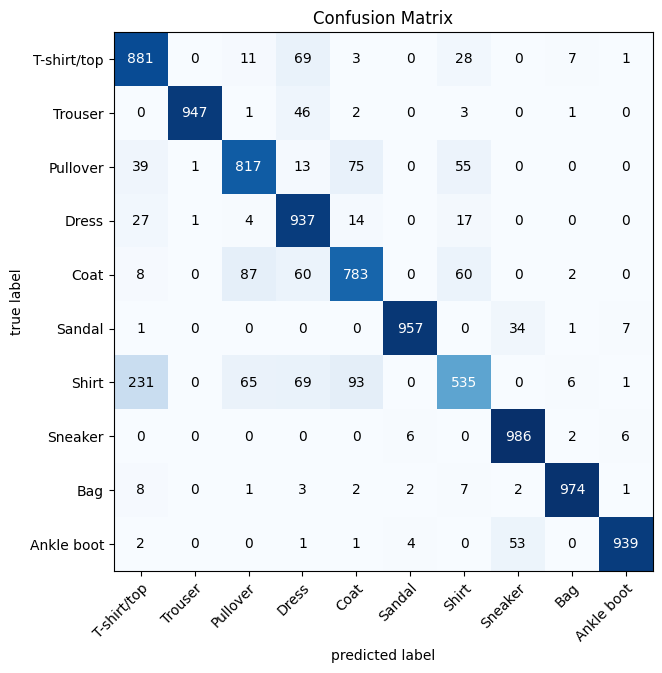

In [23]:
cm = metrics.confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, figsize=(10,7), class_names=class_names)
plt.title("Confusion Matrix")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


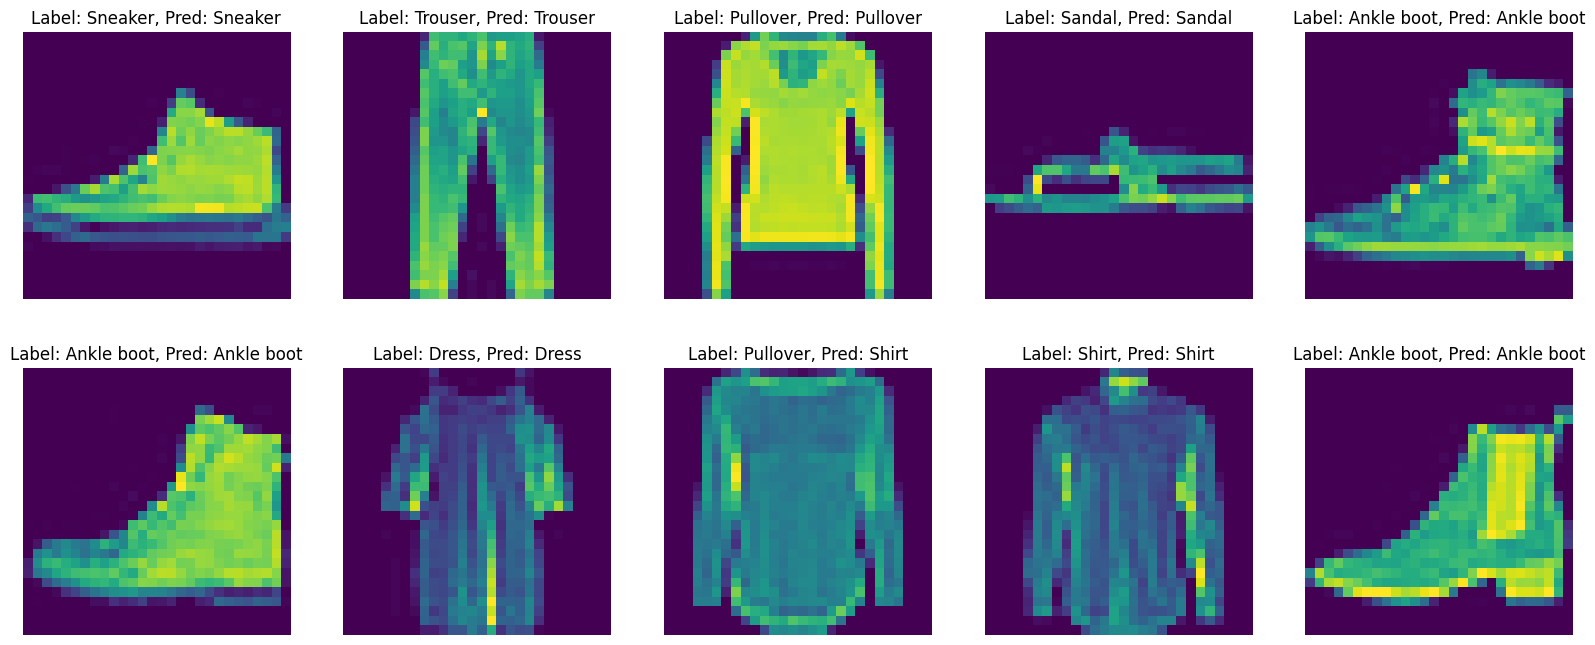

In [28]:
fig = plt.figure(figsize=(20, 8))
rows = 2
cols = 5
x = 1

for image, label in zip(images, labels):
    fig.add_subplot(rows, cols, x)
    
    # Prediction
    preds = model.predict(tf.expand_dims(image, axis=0))  # shape: (1, 10)
    pred_index = tf.argmax(preds[0]).numpy().item()
    label_index = tf.argmax(label).numpy().item()

    prediction = class_names[pred_index]
    label_name = class_names[label_index]

    plt.title(f"Label: {label_name}, Pred: {prediction}")
    plt.imshow(image / 255.0)
    plt.axis("off")
    x += 1

plt.show()
